<a href="https://colab.research.google.com/github/julian-masdatascience/ML/blob/master/COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Section 1 - Loading our Libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
# %matplotlib inline #if you're working in a Jupyter notebook

In [0]:
# Section 2 - Loading and Selecting Data
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
countries = ['Canada', 'Germany', 'United Kingdom', 'US', 'France', 'China','Colombia']
df = df[df['Country'].isin(countries)]

In [0]:
# Section 3 - Creating a Summary Column
df['Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)

In [5]:
df.sample(5)

,Date,Country,Confirmed,Recovered,Deaths,Cases
4107,2020-02-13,Colombia,0,0,0,0
10165,2020-03-16,United Kingdom,1551,21,56,1628
14466,2020-04-09,China,82883,77679,3339,163901
11317,2020-03-23,Canada,2088,10,25,2123
5771,2020-02-22,China,77001,22699,2443,102143


In [0]:
# Section 4 - Restructuring our Data
df = df.pivot(index='Date', columns='Country', values='Cases')
countries = list(df.columns)
covid = df.reset_index('Date')
covid.set_index(['Date'], inplace=True)
covid.columns = countries

# Section 5 - Calculating Rates per 100,000
populations = {'Canada':37664517, 'Germany': 83721496 , 'United Kingdom': 67802690 , 'US': 330548815, 'France': 65239883, 'China':1438027228,'Colombia':40000000}
percapita = covid.copy()
for country in list(percapita.columns):
    percapita[country] = percapita[country]/populations[country]*100000


In [7]:

df.sample(5)

Country,Canada,China,Colombia,France,Germany,US,United Kingdom
Date,,,,,,,
2020-03-11,117,145726,9,2353,1936,1325,486
2020-02-04,4,25041,0,6,12,11,2
2020-03-16,428,152160,54,6844,7356,4734,1628
2020-02-27,19,114276,0,51,62,64,23
2020-02-22,12,102143,0,17,30,20,17


In [8]:
percapita.head()

,Canada,China,Colombia,France,Germany,US,United Kingdom
Date,,,,,,,
2020-01-22,0.000000,0.041237,0.0,0.000000,0.0,0.000303,0.0
2020-01-23,0.000000,0.048052,0.0,0.000000,0.0,0.000303,0.0
2020-01-24,0.000000,0.068288,0.0,0.003066,0.0,0.000605,0.0
2020-01-25,0.000000,0.103406,0.0,0.004598,0.0,0.000605,0.0
2020-01-26,0.002655,0.151597,0.0,0.004598,0.0,0.001513,0.0


In [9]:
covid.head()

,Canada,China,Colombia,France,Germany,US,United Kingdom
Date,,,,,,,
2020-01-22,0,593,0,0,0,1,0
2020-01-23,0,691,0,0,0,1,0
2020-01-24,0,982,0,2,0,2,0
2020-01-25,0,1487,0,3,0,2,0
2020-01-26,1,2180,0,3,0,5,0


Text(2020-01-23 00:00:00, -100000, 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv')

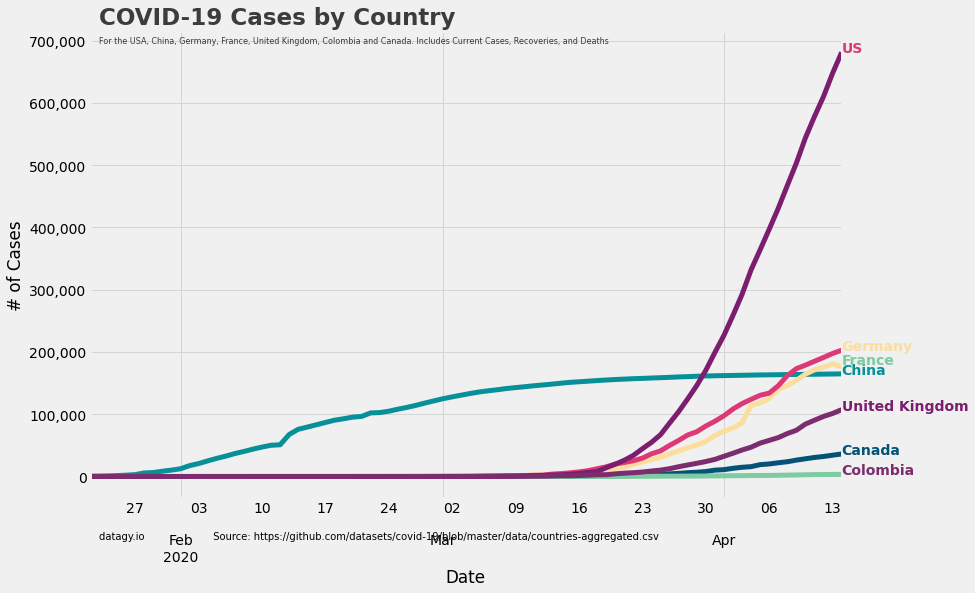

In [14]:

# Section 6 - Generating Colours and Style

# Section 6 - Generating Colours and Style
colors = {'Canada':'#045275', 'China':'#089099', 'France':'#7CCBA2', 'Germany':'#FCDE9C', 'US':'#DC3977', 'United Kingdom':'#7C1D6F','Colombia':'#7C2D6F'}
plt.style.use('fivethirtyeight')

# Section 7 - Creating the Visualization
plot = covid.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('# of Cases')

# Section 8 - Assigning Colour
for country in list(colors.keys()):
    plot.text(x = covid.index[-1], y = covid[country].max(), color = colors[country], s = country, weight = 'bold')

# Section 9 - Adding Labels
plot.text(x = covid.index[1], y = int(covid.max().max())+45000, s = "COVID-19 Cases by Country", fontsize = 23, weight = 'bold', alpha = .75)
plot.text(x = covid.index[1], y = int(covid.max().max())+15000, s = "For the USA, China, Germany, France, United Kingdom, Colombia and Canada. Includes Current Cases, Recoveries, and Deaths", fontsize = 8, alpha = .75)
plot.text(x = percapita.index[1], y = -100000,s = 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', fontsize = 10)


Text(2020-01-23 00:00:00, -55, 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv')

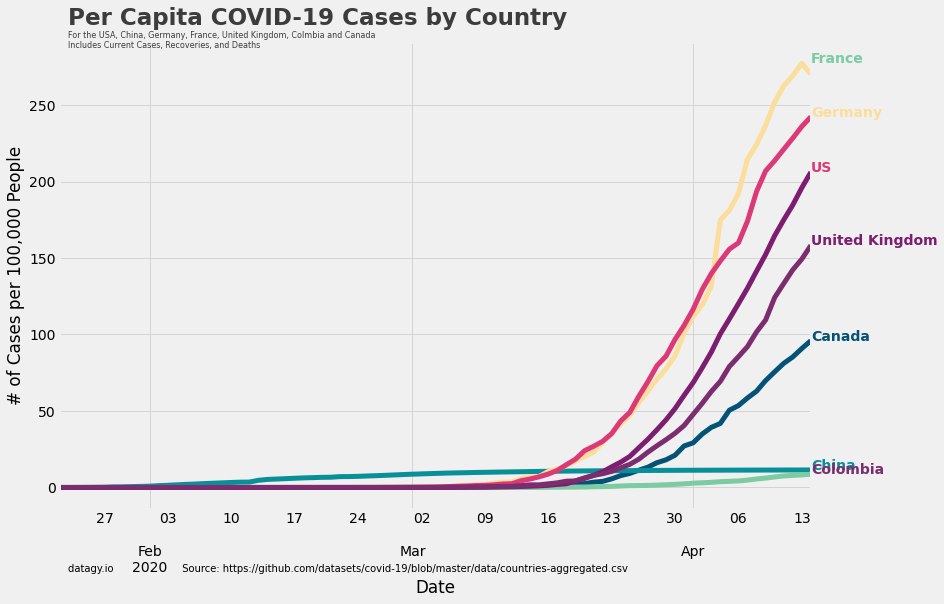

In [16]:

percapitaplot = percapita.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
percapitaplot.grid(color='#d4d4d4')
percapitaplot.set_xlabel('Date')
percapitaplot.set_ylabel('# of Cases per 100,000 People')
for country in list(colors.keys()):
    percapitaplot.text(x = percapita.index[-1], y = percapita[country].max(), color = colors[country], s = country, weight = 'bold')
percapitaplot.text(x = percapita.index[1], y = percapita.max().max()+25, s = "Per Capita COVID-19 Cases by Country", fontsize = 23, weight = 'bold', alpha = .75)
percapitaplot.text(x = percapita.index[1], y = percapita.max().max()+10, s = "For the USA, China, Germany, France, United Kingdom, Colmbia and Canada\nIncludes Current Cases, Recoveries, and Deaths", fontsize = 8, alpha = .75)
percapitaplot.text(x = percapita.index[1], y = -55,s = 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', fontsize = 10)